In [2]:
from main_SMNN import *
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Repetition  1  of  1
Dataset with  2  features.
Training neural network...
13/13 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8700
[0.32251498103141785, 0.8700000047683716]
Training neural network...
13/13 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8975
[0.28886958956718445, 0.8974999785423279]
Training neural network...
13/13 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.9075
[0.25939714908599854, 0.9075000286102295]
Evaluation on test
Model 0
4/4 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8400
Model 1
4/4 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8400
Model 2
4/4 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8400
---------------

Repetition  1  of  1
Dataset with  3  features.
Training neural network...
13/13 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8775
[0.3764

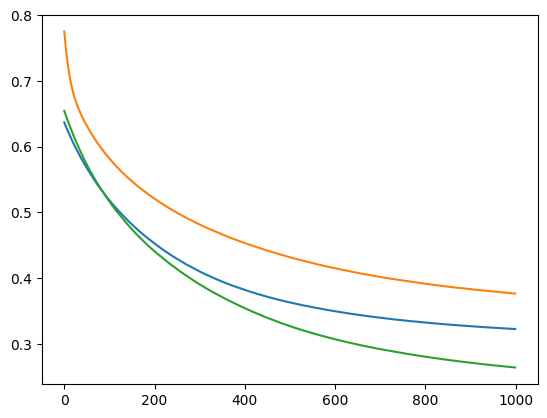

In [25]:
n_features = [2,3,4]
size = 500 # number of points
n_classes = 2 # binary classification
results = dict()
epochs=1000
n_rep=1
metrics_a = []
metrics_l = []
for n in n_features:
    metrics0_l = []
    metrics1_l = []
    metrics2_l = []
    metrics0_a = []
    metrics1_a = []
    metrics2_a = []
    X,y=datasets.make_classification(size, n_features=n, n_redundant=0,n_classes=n_classes,n_informative=2,class_sep=0.8)
    X_centered = X-X.mean()
    X_scaled = (n/2)*(X_centered-X_centered.min())/(X_centered.max()-X_centered.min())
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)
    bar_iterations=2
    dim=n
    dic_sups = dic_supports(supports(bar_iterations,dim))
    sups = supports(bar_iterations,dim)
    data = X_train
    d=itek_barycentrics(data,bar_iterations)
    bis = [bis_cons(d,ite,dim) for ite in range(bar_iterations+1)]
    n_samples = len(X_train)

    n_classes = len(set(y_train))
    y_hot=tf.one_hot(y_train,depth=n_classes)
    y_hot=np.array(y_hot)

    for j in range(n_rep):
        print("Repetition ",j+1," of ", n_rep)
        print("Dataset with ", n, " features.")
        

        verbose = False
        epochs = 1000
        model0,history0=SMNN(bis[0],y_train,epochs,verbose =verbose)
        print(model0.evaluate(bis[0],y_hot))
        plt.plot(history0.history['loss'])
        #plt.show()
        vsi = [bis_cons(itek_barycentrics(sups[i],i),i,dim) for i in range(bar_iterations)]
        vs0 = np.matmul(vsi[0],model0.get_weights())
        weights0=vs0 #np.matmul(P(2),model0.get_weights())#vs0


        model1,history1=SMNN(bis[1],y_train,epochs,weights0,verbose =verbose)
        print(model1.evaluate(bis[1],y_hot))

        #plt.show()
        vs1=np.matmul(vsi[1],model1.get_weights())
        weights1=vs1

        model2,history2=SMNN(bis[2],y_train,epochs,weights1,verbose =verbose)
        print(model2.evaluate(bis[2],y_hot))

        #vs2=np.matmul(vsi[2],model2.get_weights())
        #weights2=vs2

        #model3,history3=SMNN(bis[3],y_train,epochs,weights2,verbose =verbose)
        #print(model3.evaluate(bis[3],y_hot))


        n_classes = len(set(y_train))
        y_hot=tf.one_hot(y_train,depth=n_classes)
        y_hot=np.array(y_hot)
        data = X_test
        d_test=itek_barycentrics(data,bar_iterations)
        bis_test = [bis_cons(d_test,ite,dim) for ite in range(bar_iterations+1)]
        yt_hot=tf.one_hot(y_test,depth=n_classes)
        yt_hot=np.array(yt_hot)
        print("Evaluation on test")
        print("Model 0")
        m=model0.evaluate(bis_test[0],yt_hot)
        metrics0_l.append(m[0])
        metrics0_a.append(m[1])
        print("Model 1")
        m=model1.evaluate(bis_test[1],yt_hot)
        metrics1_l.append(m[0])
        metrics1_a.append(m[1])
        print("Model 2")
        m=model2.evaluate(bis_test[2],yt_hot)
        metrics2_l.append(m[0])
        metrics2_a.append(m[1])
        #print("Model 3")
        #model3.evaluate(bis_test[3],yt_hot)
        print("---------------\n")
        metrics_a.append([metrics0_a,metrics1_a,metrics2_a])
        metrics_l.append([metrics0_l,metrics1_l,metrics2_l])


In [26]:
metrics_a

[[[0.8399999737739563], [0.8399999737739563], [0.8399999737739563]],
 [[0.8899999856948853], [0.8899999856948853], [0.8799999952316284]],
 [[0.8899999856948853], [0.8700000047683716], [0.8700000047683716]]]

In [27]:
metrics_l

[[[0.40414202213287354], [0.39317190647125244], [0.3832445442676544]],
 [[0.38511744141578674], [0.3472175896167755], [0.24259452521800995]],
 [[0.35323160886764526], [0.4325278103351593], [0.7546022534370422]]]